In [2]:
import numpy as np

In [26]:
2*np.exp(-2)

0.2706705664732254

In [33]:
2*2.7**(-2)

0.2743484224965706

In [32]:
2**3

8

---
## Discrete distribution

- Bernoulli
- Binomial
- Poission
- Hypergeometric

확률변수(random variable)란, 무작위 실험시 어떤 확률로 발생하는 결과값을 수치적 값으로 표현하는 변수  

확률분포(Probability Distribution)란,  모든 확률변수 값에 대응되는 확률들의 분포

확률함수(Probability Function)란,  확률변수들에 의해 정의된 실수를 확률값에 대응시키는 함수

<span style='color:blue'>확률 질량 함수(確率質量函數, probability mass function, PMF)는 이산 확률 변수에서 특정 값에 대한 확률을 나타내는 함수</span>이다. 이 함수는 연속 확률 변수에서의 확률 밀도 함수와 대응된다.

예를 들어, 주사위를 한 번 굴릴 때의 값을 나타내는 확률 변수가 $X$일 때, 이 확률 변수에 대응되는 확률 질량 함수는  

$f_{X}(x)=1/6 $이다.

확률 변수 ${\displaystyle X:S\to \mathbb {R} }X:S\to {\mathbb  {R}}$가 표본 공간 (sample space) S에 의해 정의되는 이산 확률 변수일 때, 확률 질량 함수 ${\displaystyle f_{X}(x):\mathbb {R} \to [0,1]}f_{X}(x):{\mathbb  {R}}\to [0,1]$는   
$f_{X}(x)=\Pr(X=x)=\Pr(\{s\in S:X(s)=x\})$
이다.

___

### 1. Binomial

N번 시행시 k번 성공할 확률

일반적으로, 확률변수 K가 매개변수 n과 p를 가지는 이항분포를 따른다면, K ~ B(n,p)라고 쓴다. n번 시행 중에 k번 성공할 확률은 확률 질량 함수로 주어진다:  


${\displaystyle \Pr(K=k)=f(k;n,p)={n \choose k}p^{k}(1-p)^{n-k}}$

이 때, k = 0, 1, 2, ..., n 이고,

${\displaystyle {n \choose k}={\frac {n!}{k!(n-k)!}}}$

___

<span style="color:blue"> numpy.random.binomial(n, p, size=None) </span> 

n : int or array_like of ints
Parameter of the distribution, >= 0. Floats are also accepted, but they will be truncated to integers.

p : float or array_like of floats
Parameter of the distribution, >= 0 and <=1.

size : int or tuple of ints, optional Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if n and p are both scalars. Otherwise, np.broadcast(n, p).size samples are drawn.

out : ndarray or scalar 
Drawn samples from the parameterized binomial distribution, where each sample is equal to the number of successes over the n trials.
___

Mean : $\mu = np$  
Variance : $\sigma^2 = npq$  
Standarddeviation : $\sigma = \sqrt{npq}$

___

In [8]:
n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000)
# result of flipping a coin 10 times, tested 1000 times.
sum(np.random.binomial(9, 0.1, 20000) == 0)/20000.
# answer = 0.38885, or 38%.

0.3851

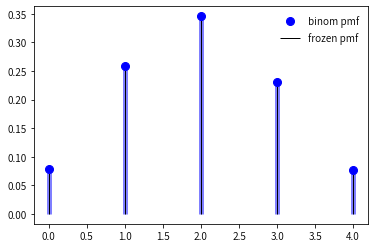

True


In [95]:
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

#Calculate a few first moments:

n, p = 5, 0.4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
#Display the probability mass function (pmf):

x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
# Alternatively, the distribution object can be called (as a function) to fix the shape and location. This returns a “frozen” RV object holding the given parameters fixed.

# Freeze the distribution and display the frozen pmf:

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

#Check accuracy of cdf and ppf:

prob = binom.cdf(x, n, p)
print(np.allclose(x, binom.ppf(prob, n, p)))

#Generate random numbers:

r = binom.rvs(n, p, size=1000)

***
### 2. Poisson Ditribution

단위 시간 안에 어떤 사건이 몇 번 발생할 것인지를 표현하는 이산 확률 분포

정해진 시간 안에 어떤 사건이 일어날 횟수에 대한 기댓값을 $\lambda$ 라고 했을 때, 그 사건이 $n$회 일어날 확률은 다음과 같다.

${\displaystyle f(n;\lambda )={\frac {\lambda ^{n}e^{-\lambda }}{n!}},\,\!}$   여기서 $e$는 자연상수이다.

___
<span style="color:blue">numpy.random.poisson(lam=1.0, size=None)</span>  
Draw samples from a Poisson distribution.

The Poisson distribution is the limit of the binomial distribution for large N.

Parameters:	
lam : float or array_like of floats
Expectation of interval, should be >= 0. A sequence of expectation intervals must be broadcastable over the requested size.

size : int or tuple of ints, optional
Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if lam is a scalar. Otherwise, np.array(lam).size samples are drawn.

Returns:	
out : ndarray or scalar
Drawn samples from the parameterized Poisson distribution.
___
Mean : $\mu$  
Standarad deviation : $\sigma = \sqrt{\mu}$

___

A Poisson discrete random variable.

Discrete random variables are defined from a standard form and may require some shape parameters to complete its specification. Any optional keyword parameters can be passed to the methods of the RV object as given below:

Parameters:	 x : array_like quantiles

q : array_like lower or upper tail probability

mu : array_like  shape parameters

loc : array_like, optional  location parameter (default=0)

size : int or tuple of ints, optional  shape of random variates (default computed from input arguments )

moments : str, optional 

composed of letters [‘mvsk’] specifying which moments to compute where ‘m’ = mean, ‘v’ = variance, ‘s’ = (Fisher’s) skew and ‘k’ = (Fisher’s) kurtosis. Default is ‘mv’.

Alternatively, the object may be called (as a function) to fix the shape and

location parameters returning a “frozen” discrete RV object: rv = poisson(mu, loc=0)

Frozen RV object with the same methods but holding the given shape and location fixed.
___

- rvs(mu, loc=0, size=1)	Random variates.  
- pmf(x, mu, loc=0)	Probability mass function.  
- logpmf(x, mu, loc=0)	Log of the probability mass function.  
- cdf(x, mu, loc=0)	Cumulative density function.  
- logcdf(x, mu, loc=0)	Log of the cumulative density function.  
- sf(x, mu, loc=0)	Survival function (1-cdf — sometimes more accurate).  
- logsf(x, mu, loc=0)	Log of the survival function.  
- ppf(q, mu, loc=0)	Percent point function (inverse of cdf — percentiles).  
- isf(q, mu, loc=0)	Inverse survival function (inverse of sf).  
- stats(mu, loc=0, moments='mv')	Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’).  
- entropy(mu, loc=0)	(Differential) entropy of the RV.  
- expect(func, mu, loc=0, lb=None, ub=None, conditional=False)	Expected value of a function (of one argument) with respect to the distribution.  
- median(mu, loc=0)	Median of the distribution.  
- mean(mu, loc=0)	Mean of the distribution.  
- var(mu, loc=0)	Variance of the distribution.  
- std(mu, loc=0)	Standard deviation of the distribution.  
- interval(alpha, mu, loc=0)	Endpoints of the range that contains alpha percent of the distribution  

___

In [57]:
# 2주에 평균적으로 1회 발생할때, 1회 발생활 확률
poisson.pmf(1,mu=2)

0.2706705664732254

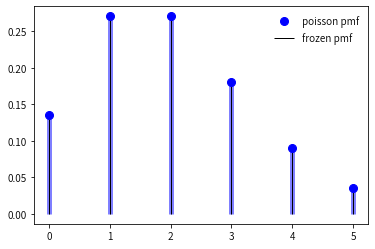

In [51]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

#Calculate a few first moments:

mu = 2
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

#Display the probability mass function (pmf):

x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))

ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

#Alternatively, freeze the distribution and display the frozen pmf:
rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

In [48]:
# Check accuracy of cdf and ppf:

prob = poisson.cdf(x, mu)
np.allclose(x, poisson.ppf(prob, mu))

True

In [50]:
# Generate random numbers:
# r = poisson.rvs(mu, size=1000)

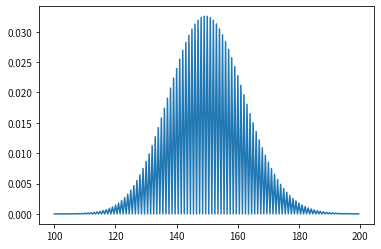

In [49]:
from scipy.stats import poisson
import numpy as np 
import matplotlib.pyplot as plt

x= np.arange(100,200,0.5)
plt.plot(x, poisson.pmf(x,150))
plt.show()


### 3.Hypergeometric distribution

크기가 N(k의 성공과, n-k의 실패)인 모집단에서 n개의 표본을 택한다. 이때 성공의 개수 x를 초기하 확률변수라고 함

The hypergeometric distribution is a discrete probability distribution that describes   
the probability of ${\displaystyle k}$ successes (random draws for which the object drawn has a specified feature) in ${\displaystyle n}$ draws, without replacement,   
from a finite population of size ${\displaystyle N}$ that contains exactly ${\displaystyle K}$ objects   
with that feature, wherein each draw is either a success or a failure.  
In contrast, the binomial distribution describes the probability of ${\displaystyle k}$ successes in ${\displaystyle n}$ draws with replacement.  

___

A random variable ${\displaystyle X}$ follows the hypergeometric distribution if its probability mass function (pmf) is given by  

${\displaystyle p_{X}(k)=\Pr(X=k)={\frac {{\binom {K}{k}}{\binom {N-K}{n-k}}}{\binom {N}{n}}},}$

where

${\displaystyle N}$ is the population size,  
${\displaystyle K}$ is the number of success states in the population,  
${\displaystyle n}$ is the number of draws (i.e. quantity drawn in each trial),  
${\displaystyle k}$ is the number of observed successes,  
${\textstyle \textstyle {a \choose b}}$ is a binomial coefficient.  

The pmf is positive when ${\displaystyle \max(0,n+K-N)\leq k\leq \min(K,n)}\max(0,n+K-N)\leq k\leq \min(K,n)$.

A random variable distributed hypergeometrically with parameters ${\displaystyle N}, {\displaystyle K}$ and ${\displaystyle n}$ is written ${\textstyle X\sim \operatorname {Hypergeometric} (N,K,n)}$ and has probability mass function ${\textstyle p_{X}(k)}$ above.

___

Mean : $\mu$ = $n ({M}\over{n})$

scipy.stats.hypergeom
scipy.stats.hypergeom = <scipy.stats._discrete_distns.hypergeom_gen object at 0x2b45d2fe25d0>  

A hypergeometric discrete random variable.

The hypergeometric distribution models drawing objects from a bin.  

M(모집단 원소수) is the total number of objects, n(성공개수) is total number of Type I objects.  
The random variate represents the number of Type I objects in N(뽑는 개수) drawn without replacement from the total population.  

Discrete random variables are defined from a standard form and may require some shape parameters to complete its specification. 
Any optional keyword parameters can be passed to the methods of the RV object as given below:

Parameters:	
x : array_like  quantiles

q : array_like  lower or upper tail probability

M, n, N : array_like  shape parameters

loc : array_like, optional  location parameter (default=0)

size : int or tuple of ints, optional shape of random variates (default computed from input arguments )

moments : str, optional  composed of letters [‘mvsk’] specifying which moments to compute where ‘m’ = mean, ‘v’ = variance, ‘s’ = (Fisher’s) skew and ‘k’ = (Fisher’s) kurtosis. (default=’mv’)

Alternatively, the object may be called (as a function) to fix the shape and location parameters returning a “frozen” discrete RV object:

rv = hypergeom(M, n, N, loc=0)   Frozen RV object with the same methods but holding the given shape and location fixed.

- mean(M, n, N, loc=0)	Mean of the distribution.
- var(M, n, N, loc=0)	Variance of the distribution.
- std(M, n, N, loc=0)	Standard deviation of the distribution.

___

pmf(k, M, n, N) = choose(n, k) * choose(M - n, N - k) / choose(M, N),  for max(0, N - (M-n)) <= k <= min(n, N)

___
                               

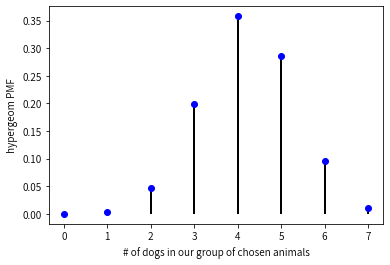

In [60]:
#Suppose we have a collection of 20 animals, of which 7 are dogs. 
#Then if we want to know the probability of finding a given number of dogs 
#if we choose at random 12 of the 20 animals, 
#we can initialize a frozen distribution and plot the probability mass function:

from scipy.stats import hypergeom
import matplotlib.pyplot as plt

[M, n, N] = [20, 7, 12]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'bo')
ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set_xlabel('# of dogs in our group of chosen animals')
ax.set_ylabel('hypergeom PMF')
plt.show()

___
ex)
A package of 8 AA batteries contains 2 batteries *defective, (N = 8, K = 6, N-K = 2)
n = 4, k = 4

In [61]:
[M,n,N] = [8,6,4]
rv = hypergeom(M,n,N)
rv.pmf(4)

0.21428571428571402

In [62]:
rv.mean()

3.0

In [63]:
rv.var()

0.42857142857142855

## Continuouis Distribution
 - Uniform Distribution
 - Exponential Distribution
 - Gamma Distribution
 - Beta Distribution
 - Normal Distribution
 - T-Distribution
 - Chi-Square Distribution
 - F Distribution
 - Lognormal Distribution
 - Weibull Distribution

### 1. uniform distribution 

___
The probability density function of the uniform distribution is

$p(x) = \frac{1}{b - a}$

anywhere within the interval [a, b), and zero elsewhere.

When high == low, values of low will be returned. If high < low, the results are officially undefined and may eventually raise an error, i.e. do not rely on this function to behave when passed arguments satisfying that inequality condition.
___

$E(X) = \frac{a+b}{2}$  
$Var(X) = \frac{(b-a)^2}{12}$

True
True


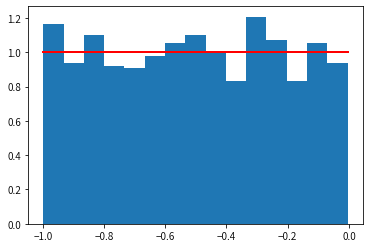

In [66]:
#Draw samples from the distribution:

s = np.random.uniform(-1,0,1000)

#All values are within the given interval:
print(np.all(s >= -1))
print(np.all(s < 0))

#Display the histogram of the samples, along with the probability density function:

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

### 2. Exponentail Distribution

___
he exponential distribution is the probability distribution of the time between events in a Poisson point process,   
i.e., a process in which events occur continuously and independently at a constant average rate.   
It is a particular case of the gamma distribution. It is the continuous analogue of the geometric distribution, and it has the key property of being memoryless.  
In addition to being used for the analysis of Poisson point processes it is found in various other contexts.  

The exponential distribution is not the same as the class of exponential families of distributions,  
which is a large class of probability distributions that includes the exponential distribution as one of its members,   
but also includes the normal distribution, binomial distribution, gamma distribution, Poisson, and many others.  
___

Probability density function
The probability density function (pdf) of an exponential distribution is

${\displaystyle f(x;\lambda )={\begin{cases}\lambda e^{-\lambda x}&x\geq 0,\\0&x<0.\end{cases}}} f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}$  

Here λ > 0 is the parameter of the distribution, often called the rate parameter.   

The distribution is supported on the interval [0, ∞). If a random variable X has this distribution, we write X ~ Exp(λ).

The exponential distribution exhibits infinite divisibility.  

Cumulative distribution function  
The cumulative distribution function is given by  

${\displaystyle F(x;\lambda )={\begin{cases}1-e^{-\lambda x}&x\geq 0,\\0&x<0.\end{cases}}}F(x;\lambda) = \begin{cases} 1-e^{-\lambda x} & x \ge 0, \\
0 & x < 0. \end{cases}$

Alternative parametrization  

The exponential distribution is sometimes parametrized in terms of the scale parameter β = 1/λ:  

${\displaystyle f(x;\beta )={\begin{cases}{\frac {1}{\beta }}e^{-x/\beta }&x\geq 0,\\0&x<0.\end{cases}}}{\displaystyle f(x;\beta )={\begin{cases}{\frac {1}{\beta }}e^{-x/\beta }&x\geq 0,\\0&x<0.\end{cases}}}$

___
The mean or expected value of an exponentially distributed random variable X with rate parameter λ is given by

${\displaystyle \operatorname {E} [X]={\frac {1}{\lambda }}.}{\displaystyle \operatorname {E} [X]={\frac {1}{\lambda }}.}$  

In light of the examples given above, this makes sense: 

if you receive phone calls at an average rate of 2 per hour, then you can expect to wait half an hour for every call.

The variance of X is given by  

${\displaystyle \operatorname {Var} [X]={\frac {1}{\lambda ^{2}}},}{\displaystyle \operatorname {Var} [X]={\frac {1}{\lambda ^{2}}},}$  

so the standard deviation is equal to the mean.
___

scipy.stats.expon = <scipy.stats._continuous_distns.expon_gen object>[source]

As an instance of the rv_continuous class, expon object inherits from it a collection of generic methods (see below for the full list),  

and completes them with details specific for this particular distribution.

Notes

The probability density function for expon is:

f(x) = exp(-x) , x > 0 

The probability density above is defined in the “standardized” form.   
To shift and/or scale the distribution use the loc and scale parameters.  
Specifically, expon.pdf(x, loc, scale) is identically equivalent to  

expon.pdf(y) / scale with y = (x - loc) / scale.

A common parameterization for expon is in terms of the rate parameter lambda,  
such that pdf = lambda * exp(-lambda * x).
This parameterization corresponds to using scale = 1 / lambda.

___

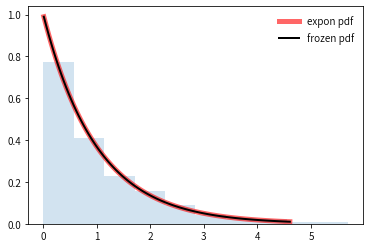

In [68]:
from scipy.stats import expon
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

#Calculate a few first moments:

mean, var, skew, kurt = expon.stats(moments='mvsk')

#Display the probability density function (pdf):

x = np.linspace(expon.ppf(0.01),expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x), 'r-', lw=5, alpha=0.6, label='expon pdf')

# Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. 
# This returns a “frozen” RV object holding the given parameters fixed.

# Freeze the distribution and display the frozen pdf:

rv = expon()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf:

vals = expon.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], expon.cdf(vals))

# Generate random numbers:

r = expon.rvs(size=1000)

# And compare the histogram:

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()


### 3. Gamma Distribution

the gamma distribution is a two-parameter family of continuous probability distributions.   
The exponential distribution, Erlang distribution, and chi-squared distribution are special cases of the gamma distribution. 

There are three different parametrizations in common use:

With a shape parameter k and a scale parameter θ.  
With a shape parameter α = k and an inverse scale parameter β = 1/θ, called a rate parameter.  
With a shape parameter k and a mean parameter μ = kθ = α/β.  
In each of these three forms, both parameters are positive real numbers.  

The gamma distribution is the maximum entropy probability distribution   
(both with respect to a uniform base measure and with respect to a 1/x base measure)  
for a random variable X for which E[X] = kθ = α/β is fixed and greater than zero, and E[ln(X)] = ψ(k) + ln(θ) = ψ(α) − ln(β) is fixed (ψ is the digamma function).[1]

___

scipy.stats.gamma = <scipy.stats._continuous_distns.gamma_gen object>[source]
A gamma continuous random variable.

As an instance of the rv_continuous class, gamma object inherits from it a collection of generic methods (see below for the full list), and completes them with details specific for this particular distribution.

gamma takes a as a shape parameter for .

When  is an integer, gamma reduces to the Erlang distribution, and when  to the exponential distribution.

The probability density above is defined in the “standardized” form. To shift and/or scale the distribution use the loc and scale parameters. 

Specifically, gamma.pdf(x, a, loc, scale) is identically equivalent to gamma.pdf(y, a) / scale with y = (x - loc) / scale.
___

True


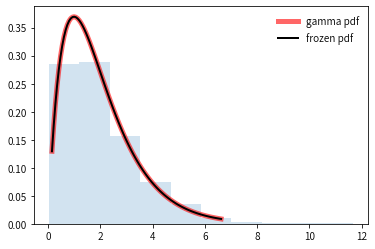

In [94]:
from scipy.stats import gamma
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

# Calculate a few first moments:

a = 1.99
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')

#Display the probability density function (pdf):

x = np.linspace(gamma.ppf(0.01, a), gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a), 'r-', lw=5, alpha=0.6, label='gamma pdf')

# Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. 
# This returns a “frozen” RV object holding the given parameters fixed.

# Freeze the distribution and display the frozen pdf:

rv = gamma(a)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf:

vals = gamma.ppf([0.001, 0.5, 0.999], a)

print(np.allclose([0.001, 0.5, 0.999], gamma.cdf(vals, a)))

# Generate random numbers:

r = gamma.rvs(a, size=1000)

# And compare the histogram:

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

### 4. Beta Distribution

he beta distribution is a family of continuous probability distributions defined on the interval [0, 1] parametrized by two positive shape parameters, denoted by α and β,   
that appear as exponents of the random variable and control the shape of the distribution.   
The beta distribution has been applied to model the behavior of random variables limited to intervals of finite length in a wide variety of disciplines.  

In Bayesian inference, the beta distribution is the conjugate prior probability distribution for the Bernoulli, binomial, negative binomial and geometric distributions.   
For example, the beta distribution can be used in Bayesian analysis to describe initial knowledge concerning probability of success   
such as the probability that a space vehicle will successfully complete a specified mission.  
The beta distribution is a suitable model for the random behavior of percentages and proportions.  
The formulation of the beta distribution discussed here is also known as the beta distribution of the first kind, whereas beta distribution of the second kind is an alternative name for the beta prime distribution.

___

The probability density function (pdf) of the beta distribution, for 0 ≤ x ≤ 1, and shape parameters α, β > 0, is a power function of the variable x and of its reflection (1 − x) as follows:

$\begin{align}
f(x;\alpha,\beta) & = \mathrm{constant}\cdot x^{\alpha-1}(1-x)^{\beta-1} \\[3pt]
& = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{\displaystyle \int_0^1 u^{\alpha-1} (1-u)^{\beta-1}\, du} \\[6pt]
& = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, x^{\alpha-1}(1-x)^{\beta-1} \\[6pt]
& = \frac{1}{\beta B (\alpha,\beta)} x^{\alpha-1}(1-x)^{\beta-1}
\end{align}$

___

scipy.stats.beta = <scipy.stats._continuous_distns.beta_gen object>[source]

A beta continuous random variable.

As an instance of the rv_continuous class, beta object inherits from it a collection of generic methods (see below for the full list), and completes them with details specific for this particular distribution.

beta takes  and  as shape parameters.
The probability density above is defined in the “standardized” form.   
To shift and/or scale the distribution use the loc and scale parameters.  
Specifically, beta.pdf(x, a, b, loc, scale) is identically equivalent to beta.pdf(y, a, b) / scale with y = (x - loc) / scale.
___

False


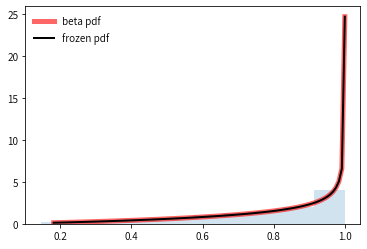

In [93]:
from scipy.stats import beta
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

#Calculate a few first moments:

a, b = 2.31, 0.627
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

#Display the probability density function (pdf):

x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='beta pdf')

#Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters.
#This returns a “frozen” RV object holding the given parameters fixed.

# Freeze the distribution and display the frozen pdf:

rv = beta(a, b)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

#Check accuracy of cdf and ppf:

vals = beta.pdf([0.001, 0.5, 0.999], a, b)

print(np.allclose([0.001, 0.5, 0.999], beta.cdf(vals, a, b)))

#Generate random numbers:

r = beta.rvs(a, b, size=1000)

# And compare the histogram:

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

### 5. Normal Distribution

the normal (or Gaussian or Gauss or Laplace–Gauss) distribution is a very common continuous probability distribution.   
Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known.   
A random variable with a Gaussian distribution is said to be normally distributed and is called a normal deviate.

The normal distribution is sometimes informally called the bell curve. However, many other distributions are bell-shaped (such as the Cauchy, Student's t-, and logistic distributions).

The probability density of the normal distribution is

${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$  

where

${\displaystyle \mu }$ is the mean or expectation of the distribution (and also its median and mode)  
${\displaystyle \sigma } $ is the standard deviation  
${\displaystyle \sigma ^{2}}$ is the variance

___
Linear Combination of Normal Random Variable

Averaging Independent Normal Random Variable

___

scipy.stats.norm = <scipy.stats._continuous_distns.norm_gen object at 0x4502f32c>[source]  

A normal continuous random variable.

The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.

As an instance of the rv_continuous class, norm object inherits from it a collection of generic methods (see below for the full list), and completes them with details specific for this particular distribution.

Notes

The probability density function for norm is:

norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)

The probability density above is defined in the “standardized” form. 

To shift and/or scale the distribution use the loc and scale parameters. 

Specifically, norm.pdf(x, loc, scale) is identically equivalent to norm.pdf(y) / scale with y = (x - loc) / scale.

___

 - rvs(loc=0, scale=1, size=1, random_state=None)	Random variates.
 - pdf(x, loc=0, scale=1)	Probability density function.
 - logpdf(x, loc=0, scale=1)	Log of the probability density function.
 - cdf(x, loc=0, scale=1)	Cumulative density function.
 - logcdf(x, loc=0, scale=1)	Log of the cumulative density function.
 - sf(x, loc=0, scale=1)	Survival function (1 - cdf — sometimes more accurate).
 - logsf(x, loc=0, scale=1)	Log of the survival function.
 - ppf(q, loc=0, scale=1)	Percent point function (inverse of cdf — percentiles).
 - isf(q, loc=0, scale=1)	Inverse survival function (inverse of sf).
 - moment(n, loc=0, scale=1)	Non-central moment of order n
 - stats(loc=0, scale=1, moments='mv')	Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’).
 - entropy(loc=0, scale=1)	(Differential) entropy of the RV.
 - fit(data, loc=0, scale=1)	Parameter estimates for generic data.
 - expect(func, loc=0, scale=1, lb=None, ub=None, conditional=False, **kwds)	Expected value of a function (of one argument) with respect to the distribution.
 - median(loc=0, scale=1)	Median of the distribution.
 - mean(loc=0, scale=1)	Mean of the distribution.
 - var(loc=0, scale=1)	Variance of the distribution.
 - std(loc=0, scale=1)	Standard deviation of the distribution.
 - interval(alpha, loc=0, scale=1)	Endpoints of the range that contains alpha percent of the distribution

True


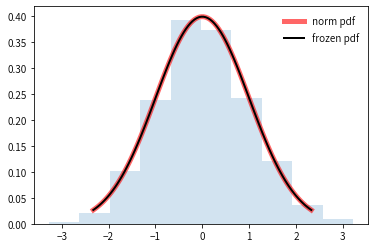

In [75]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

#Calculate a few first moments:

mean, var, skew, kurt = norm.stats(moments='mvsk')

#Display the probability density function (pdf):

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),  'r-', lw=5, alpha=0.6, label='norm pdf')

# Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters.
# This returns a “frozen” RV object holding the given parameters fixed.

# Freeze the distribution and display the frozen pdf:

rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

#Check accuracy of cdf and ppf:

vals = norm.ppf([0.001, 0.5, 0.999])
print(np.allclose([0.001, 0.5, 0.999], norm.cdf(vals)))

#Generate random numbers:

r = norm.rvs(size=1000)
# And compare the histogram:

ax.hist(r, density =True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

True
True


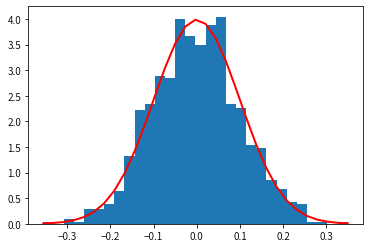

In [69]:
# Draw samples from the distribution:

mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
#Verify the mean and the variance:

print(abs(mu - np.mean(s)) < 0.01)
print(abs(sigma - np.std(s, ddof=1)) < 0.01)

#Display the histogram of the samples, along with the probability density function:

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),  linewidth=2, color='r')
plt.show()

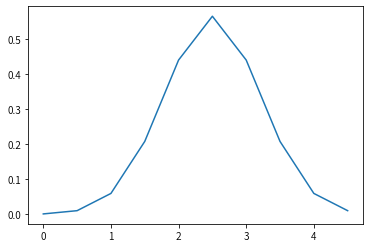

In [70]:
from scipy.stats import multivariate_normal
x = np.linspace(0, 5, 10, endpoint=False)
y = multivariate_normal.pdf(x, mean=2.5, cov=0.5); y
plt.plot(x, y)

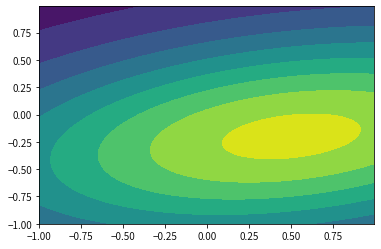

In [71]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
plt.contourf(x, y, rv.pdf(pos))

Calculation of CDF and PPF in inferential statistics  
Calculations of the quantiles and cumulative distribution functions values are required in inferential statistics, when constructing confidence intervals or   
for the implementation of hypothesis tests, especially for the calculation of the p-value.  
Functions available in different tools allow us to obtain these values. We do not longer need to use statistical tables  

CDF of the standard normal distribution (μ = 0 and σ = 1).  
Probability of less than x = 1.65 is equal to 0.9505285


In [77]:
import scipy.stats as stats

stats.norm.cdf(1.65, loc = 0, scale = 1)

0.9505285319663519

In [78]:
# Calculation of the p-value for the standard normal distribution in a right tailed test.
# The probability of more than z = 2.1 is equal to 0.01786442

1 - stats.norm.cdf(2.1)
stats.norm.sf(2.1)

0.017864420562816542

In [79]:
# Calculation of the p-value for the standard normal distribution in a twotailed test. 
#The probability of more than z = 2.1 in absolute value is equal to 0.03572884
2 * (1 - stats.norm.cdf(2.1))

0.035728841125633126

In [80]:
# PPF (q) of the standard normal distribution for the probability (1 – α) = 0.95

stats.norm.ppf(0.95, loc =0, scale = 1)

1.6448536269514722

___
Normality Check  
- plotting histogram
- plot probability plot based on queantiles
- Scipy 'normality test' (Skewness, Kurtisis, p-value)

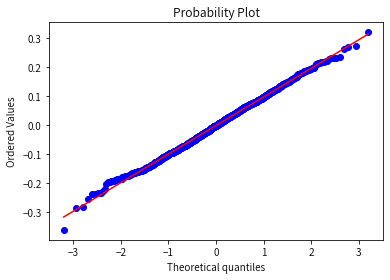

In [104]:
from scipy.stats import norm
import matplotlib.pyplot as plt

mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
_ = stats.probplot(s, plot=plt)


In [105]:
_, pVal = stats.normaltest(s)

# Or you can check for normality with Kolmogorov-Smirnov test: but this is only advisable for large sample numbers!
#_,pVal = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')

if pVal > 0.05:
    print('Data are probably normally distributed')
    
print(pVal)

Data are probably normally distributed
0.4190678323505741


With a threshold of 2.00, you get 7.0% of the data
To get 97.5% of the data, you need a threshold of 8.92.


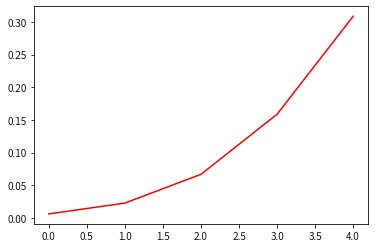

In [115]:
# Generate normally distributed random data
myMean = 5
mySD = 2
numData = 100
data = stats.norm.rvs(myMean, mySD, size=numData)

#step(bin_edges[1:],cdf)
plt.plot(x, stats.norm.cdf(x, myMean, mySD),'r')

# Find out the value corresponding to the x-th percentile: the
# "cumulative distribution function"
value = 2
myMean = 5
mySD = 2
cdf = stats.norm.cdf(value, myMean, mySD)
print(('With a threshold of {0:4.2f}, you get {1}% of the data'.format(value, round(cdf*100))))

# For the percentile corresponding to a certain value: 
# the "inverse cumulative distribution function" 
value = 0.025
icdf = stats.norm.isf(value, myMean, mySD)
print('To get {0}% of the data, you need a threshold of {1:4.2f}.'.format((1-value)*100, icdf))

### 6. T Distribution

In [81]:
# CDF of Student’s t-distribution with k (k > 0) degrees of freedom.
# Probability of less than t = 1.5 with k = 10.

stats.t.cdf(1.5,df=10)

0.9177463367772799

In [82]:
# PPF (q) of the Student’s t-distribution with k = 10 degrees
# of freedom for the probability (1 – α) = 0.95
stats.t.ppf(0.95,df=10)

1.8124611228107335

### 7. Chi-squared Distribution

In [83]:
# CDF of the CHI-SQUARED distribution with k (k > 0) degrees of freedom.
# Probability of less than t = 12.0 with k = 5.

stats.chi2.cdf(12.0,df=5)


0.9652122194937581

In [86]:
# PPF (q) of the chi-squared distribution with k = 7 degrees of
# freedom for the probability (1 – α) = 0.95

stats.chi2.ppf(0.95, df=7)


14.067140449340169